# EDA for Auto-mpg dataset
### Student: Anastasia Rizzo

## Overview

This is an exploratory data analysis on the Auto-mpg dataset found at 

https://www.kaggle.com/datasets/uciml/autompg-dataset


* The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/auto+mpg 
* Origin of this dataset is from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition. Date: July 7, 1993.

* Number of Instances: 398.
* Number of Attributes: 9 (including the target attribute).
* Missing Values: 'horsepower' has 6 missing values.

#### Metadata:

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)

## Tasks:
* Identify missing values.
* Estimate Skewness and Kurtosis.
* Correlation Heat Map.
* Scatter plot for different parameters.
* Replace categorical values with numerical values

# [Part 0: Import, Load Data](#Part-0:-Import,-Load-Data.)
* ### Import, Read data from ‘dataset.csv’ file

# [Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis.)
* ### Info, Describe, Head
* ### Missing Values
* ### Skewness and Kurtosis
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
    * #### Numerical features:  
        * Visualisation of Numerical features (pair plot)
        * Visualisation of Numerical features (scatter plot)
       
    * #### Categorical Features:
        * Visualisation for Categorical features (box plot)
        * Visualisation of Categorical features  (violin plot)
        * Encode Categorical into Numerical features  
        * Drop all Categorical features   

    * #### List of all data features (Numerical and Encoded Categorical) with strong and weak correlation to target
    * #### Visualisation of all data features (heatmap)


# Part 0: Import, Load Data.
### Import 

In [36]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
#import missingno as msno

# report warnings
import warnings
warnings.filterwarnings('ignore')

### Read data from ‘dataset.csv’ file

In [37]:
# read data from 'auto-mpg.csv' file
df = pd.read_csv("auto-mpg.csv")

# Part 1: Exploratory Data Analysis.
### Info

In [38]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Dataset consists of 398 rows and 9 attributes;

has 3 datatypes: float64(3), int64(4), object(2);

visually has no missing values (fortunately, we know that 'horsepower' attribute has 6 missing values).

### Describe

In [39]:
# describe the dataset
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Head

In [40]:
# preview of the first 5 lines of the loaded data 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
#df['Id'] = range(1, len(df) + 1)

### Missing values

By exploring our raw data from auto-mpg.csv file in Excel, some inconsistencies appears. The attribute 'horsepower' has 6 missing values presented as '?' question mark. This situation is very common - raw data most of the time is not ideal and clean. 
We have two ways how to deal with our missing values:
1. We can fill it with 'NaN' values;
2. We can drop it complitely since 6 rows is less than 10% of the whole dataset.
I will do 2nd option.

In [42]:
# drop 6 rows with '?'
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()

df.shape

(392, 9)

Now our dataset have 392 rows instead of 398.

### Skewness and Kurtosis

**Skewness** measures the asymmetry of a distribution. It indicates whether the data is skewed to the left (negative skewness) or to the right (positive skewness), or if it is approximately symmetric (skewness close to zero).

**Kurtosis** measures the "heaviness" or "tailedness" of the distribution compared to a normal distribution. Positive kurtosis indicates a distribution with heavier tails and potentially more outliers, while negative kurtosis indicates a distribution with lighter tails and potentially fewer outliers.

In [43]:
# skewness and kurtosis of the whole dataset
df.skew(), df.kurt()

(mpg             0.457092
 cylinders       0.508109
 displacement    0.701669
 horsepower      1.087326
 weight          0.519586
 acceleration    0.291587
 model year      0.019688
 origin          0.915185
 dtype: float64,
 mpg            -0.515993
 cylinders      -1.398199
 displacement   -0.778317
 horsepower      0.696947
 weight         -0.809259
 acceleration    0.444234
 model year     -1.167446
 origin         -0.841885
 dtype: float64)

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

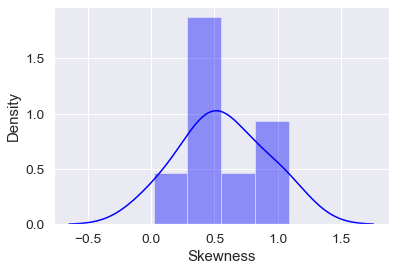

In [44]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

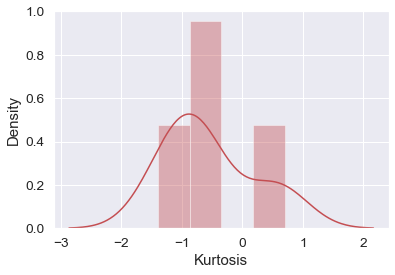

In [45]:
plt.figure(figsize = (6,4))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

We just observe the whole dataset. Now lets explore the target attribute 'mpg'.

<AxesSubplot:title={'center':'Log Normal'}, xlabel='mpg'>

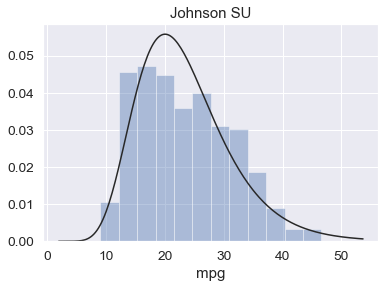

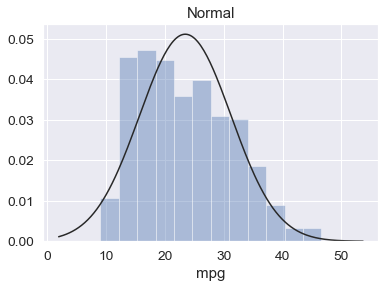

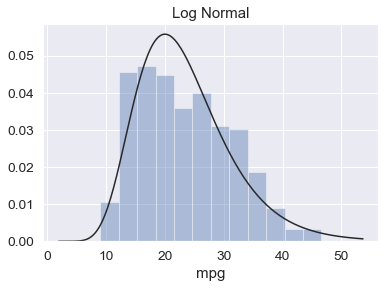

In [46]:
y = df['mpg']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

The plot above shows that the target variable 'mpg' is not normally distributed - is slightly skewed to the right.
This is a problem since most Machine Learning models don't do well with non-normally distributed data. 
It is need to be fixed.

<AxesSubplot:title={'center':'Log Normal'}, xlabel='mpg'>

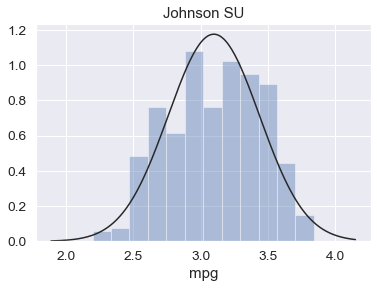

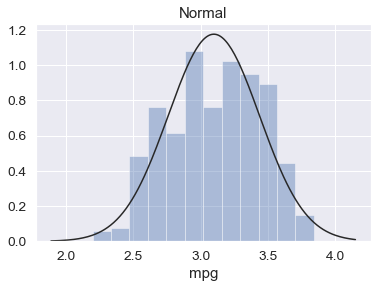

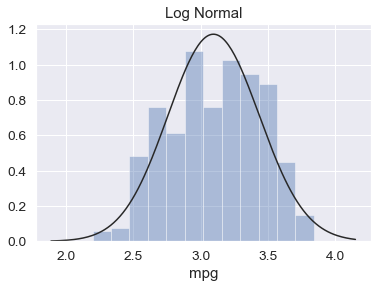

In [47]:
# apply 'log' to 'mpg' 
df['mpg'] = np.log(df['mpg'])

y = df['mpg']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

### Numerical and Categorical features


#### List of Numerical and Categorical features

In [61]:
# check for Numerical features
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin', 'horsepower_E', 'car name_E'],
      dtype='object')

Let us examine categorical features in the train dataset

In [49]:
# check for Categorical features
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['horsepower', 'car name'], dtype='object')

#### Visualisation of Numerical features

* #### Pair Plot 

#### Pair Plot between 'mpg' and correlated variables 
Visualisation of numerical features  with respect to 'mpg' in the form of pair plot & scatter pair plot for better understanding.


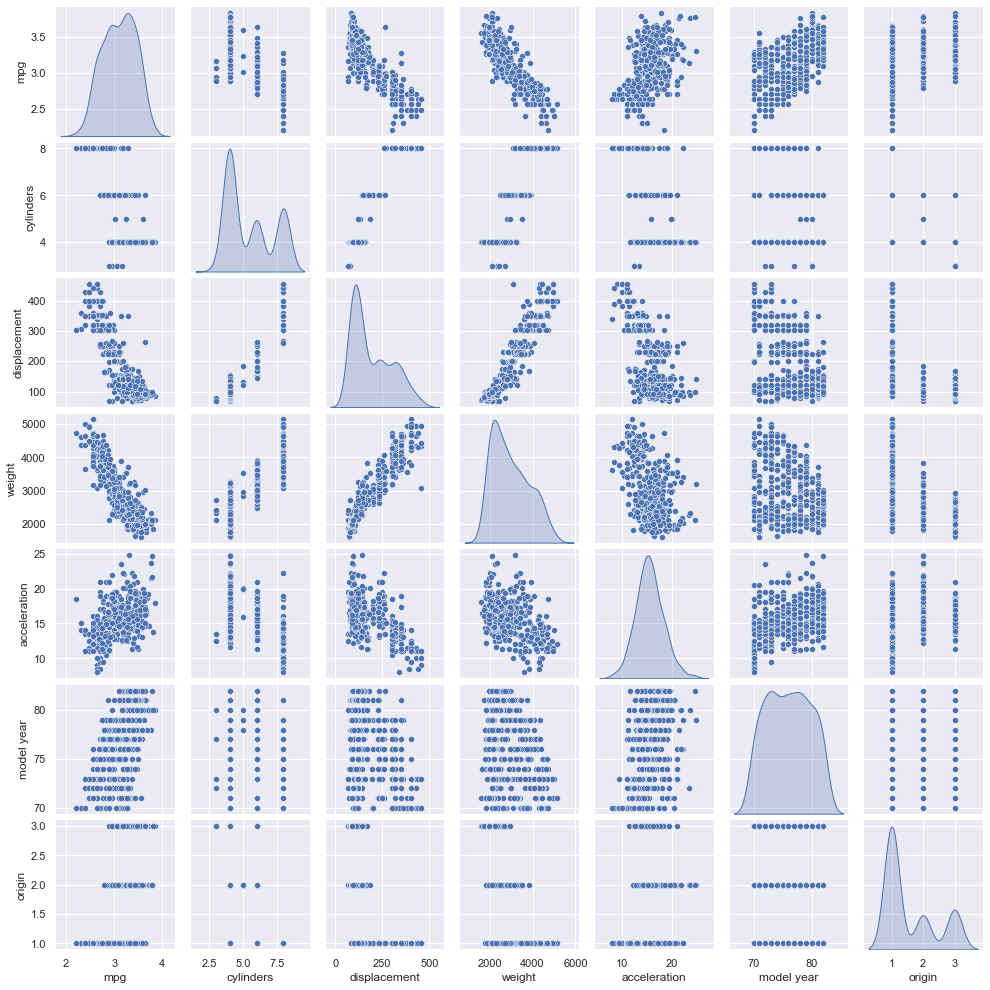

In [50]:
sns.set()
columns = ['mpg','cylinders','displacement','weight','acceleration','model year','origin']
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

* #### Scatter Plot 
#### Scatter plots between the most correlated variables

<AxesSubplot:xlabel='origin', ylabel='mpg'>

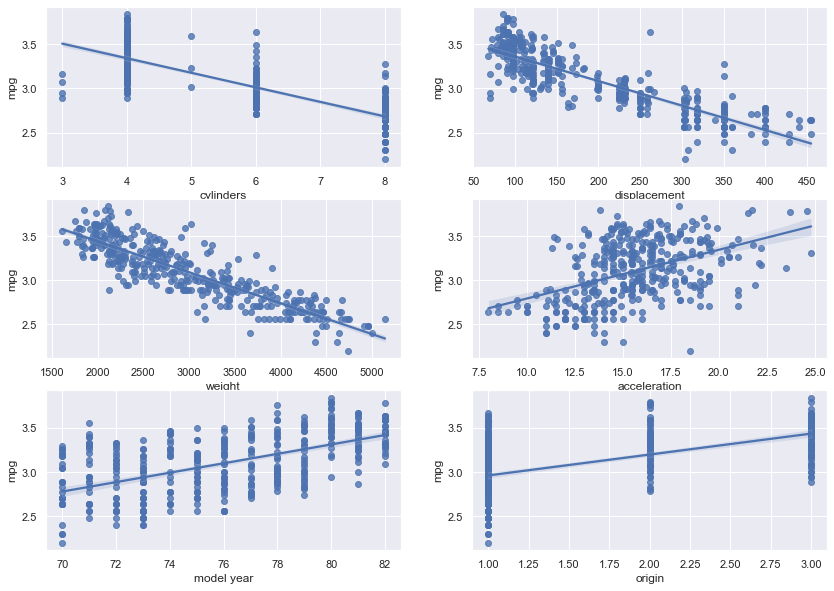

In [51]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
cylinders_scatter_plot = pd.concat([df['mpg'],df['cylinders']],axis = 1)
sns.regplot(x='cylinders',y = 'mpg',data = cylinders_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

displacement_scatter_plot = pd.concat([df['mpg'],df['displacement']],axis = 1)
sns.regplot(x='displacement',y = 'mpg',data = displacement_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

weight_scatter_plot = pd.concat([df['mpg'],df['weight']],axis = 1)
sns.regplot(x='weight',y = 'mpg',data = weight_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

acceleration_scatter_plot = pd.concat([df['mpg'],df['acceleration']],axis = 1)
sns.regplot(x='acceleration',y = 'mpg',data = acceleration_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

modelYear_scatter_plot = pd.concat([df['mpg'],df['model year']],axis = 1)
sns.regplot(x='model year',y = 'mpg',data = modelYear_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

origin_scatter_plot = pd.concat([df['mpg'],df['origin']],axis = 1)
sns.regplot(x='origin',y = 'mpg',data = origin_scatter_plot,scatter= True, fit_reg=True, ax=ax6)


#### Visualisation of Categorical features

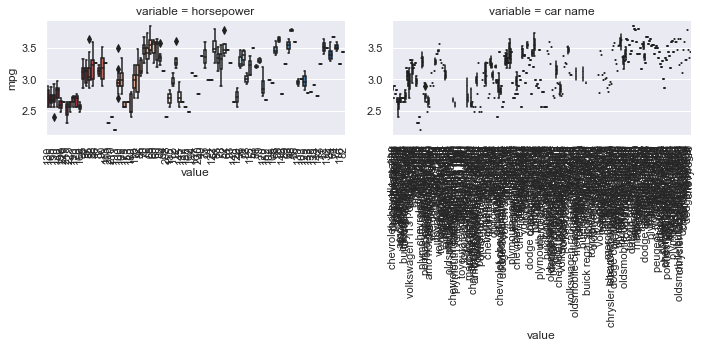

In [52]:
# visualisation of Categorical features
for c in categorical_features:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].fillna('None')

def boxplot(x, y, **kwargs):
    sns.boxplot(x = x, y = y, palette = 'RdBu')
    x = plt.xticks(rotation = 90)
f = pd.melt(df, id_vars = ['mpg'], value_vars = categorical_features)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False, height = 5 )
g = g.map(boxplot, "value", "mpg")

* #### Box Plot

#### horsepower vs mpg


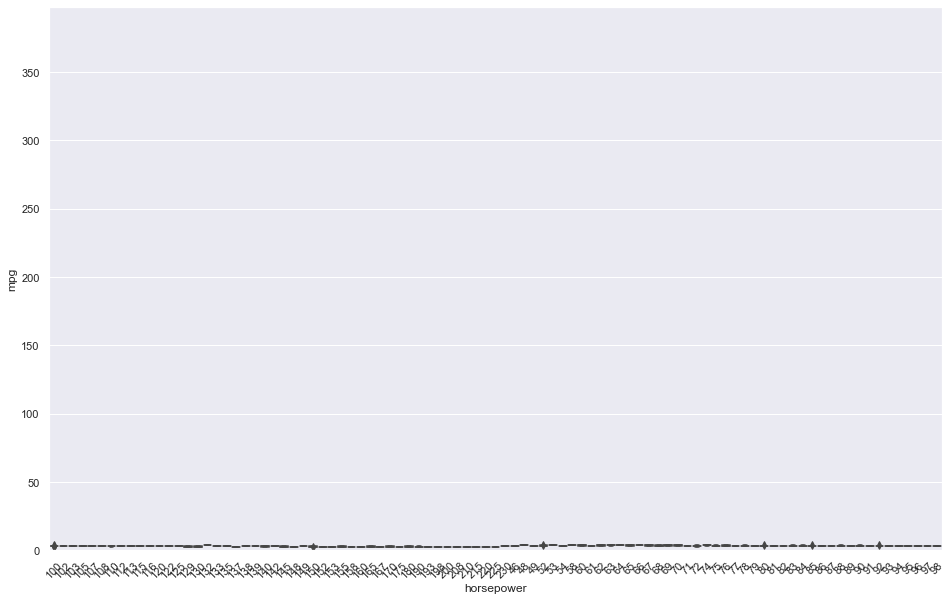

In [53]:
var = 'horsepower'
data = pd.concat([df['mpg'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=398);
xt = plt.xticks(rotation=45)

#### car name vs mpg

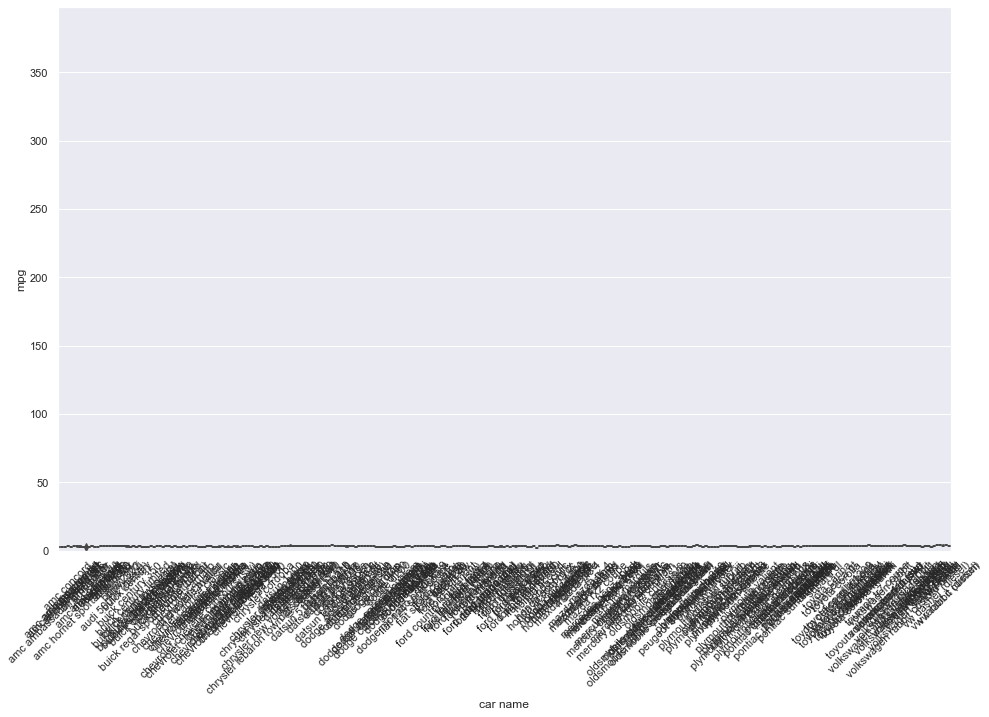

In [54]:
var = 'car name'

data = pd.concat([df['mpg'], df[var]], axis=1)

f, ax = plt.subplots(figsize=(16, 10))

fig = sns.boxplot(x=var, y="mpg", data=data)

fig.axis(ymin=0, ymax=398);

xt = plt.xticks(rotation=45)

* #### Violin Plot

#### horsepower vs mpg

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

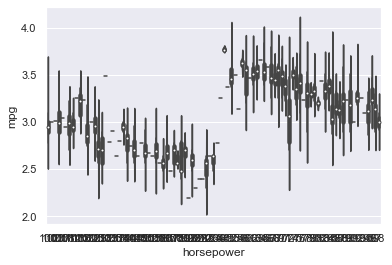

In [55]:
sns.violinplot('horsepower', 'mpg', data = df)

#### Convert Categorical into Numerical features 

In order to analyse and perform multicollinearity with Categorical features as well (and use them later for ML process) they will be converted into Numerical.

In [56]:
# encode categorical into numerical features
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'mpg']].groupby(feature).mean()['mpg']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0] + 1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature +'_E'] = o
    
categorical_encod = []
for q in categorical_features:  
    encode(df, q)
    categorical_encod.append(q +'_E')

print("Quantity of Encoded Categorical features: ", len(categorical_encod))
print()
print(df[categorical_encod].columns)

Quantity of Encoded Categorical features:  2

Index(['horsepower_E', 'car name_E'], dtype='object')


#### Drop all Categorical features 

Now with new Encoded Categorical we can drop the old Categorical features.

In [57]:
# drop old (not encoded) Categorical features
cols_to_drop = categorical_features

for df in [df]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

#### List of all data features (Numerical and Encoded Categorical) with strong and weak correlation to target

In [59]:
corr = df.corr()
corr_abs = corr.abs()

num_cols = len(df)
num_corr = corr_abs.nlargest(num_cols, 'mpg')['mpg']

print(num_corr)

mpg             1.000000
car name_E      0.978308
horsepower_E    0.907222
weight          0.875658
displacement    0.853691
cylinders       0.826824
model year      0.577275
origin          0.560508
acceleration    0.447574
Name: mpg, dtype: float64


#### Visualisation of all data features (heatmap)

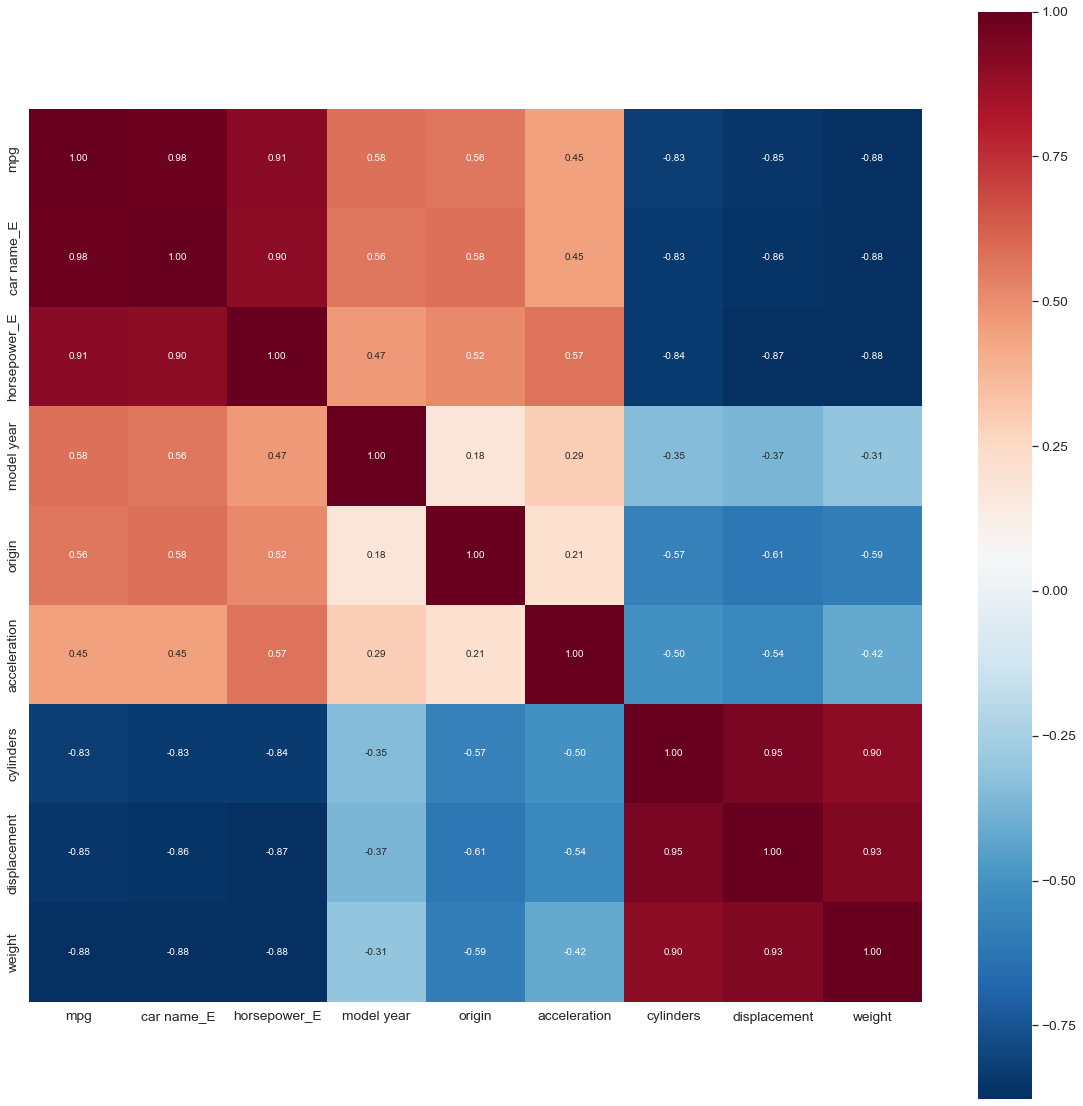

In [64]:
# correlation matrix for 27 features with the strongest correlation to target
k = 9  # number of variables for heatmap
cols = corr.nlargest(k, 'mpg')['mpg'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
(f, ax) = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    cmap='RdBu_r',
    yticklabels=cols.values,
    xticklabels=cols.values,
    )
plt.show()